In [1]:
import numpy as np
import os
import pathlib
import sys

if pathlib.Path(os.getcwd()).parents[2] not in sys.path:
    sys.path.append(str(pathlib.Path(os.getcwd()).parents[2]))

from Sensors.BatEcho.Spatializer import Render
from Sensors.BatEcho import Setting as sensorconfig

from Gym.BeaconDocking_v0 import Helper

np.random.seed(1)

In [2]:
from Control.SensorimotorLoops.BatEcho import AvoidApproach
from Simulation.Motion import State

### Create Maze, Beacons and Bat Pose

In [3]:
obstacles = Helper.box_builder('')
bat_pose, beacons = Helper.initializer(jit=1)
# merge obstacles and beacons into an objects array
objects = Helper.concatenate_beacons(beacon_objs=Helper.beacons2objects(beacons), 
                                     objects=obstacles)

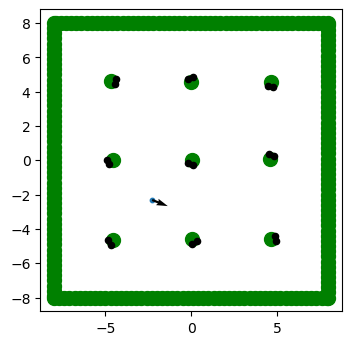

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(dpi=100)
ax.scatter(objects[objects[:,2]==2][:,0], objects[objects[:,2]==2][:,1], c='g', s=100)
ax.scatter(objects[objects[:,2]==1][:,0], objects[objects[:,2]==1][:,1], c='k', s=20)
ax.scatter(bat_pose[0], bat_pose[1], s=10)
ax.quiver(bat_pose[0], bat_pose[1], np.cos(bat_pose[2]), np.sin(bat_pose[2]))

ax.set_aspect('equal')

In [7]:
pose = np.copy(bat_pose)
render = Render()
state = State(pose=pose, dt=1/40)
controller = AvoidApproach()
poses = np.copy(pose).reshape(1,3)
for _ in range(10000):
    compressed = render.run(pose, objects)
    v, omega = controller.get_kinematic(compressed)
    state.update_kinematic(kinematic=[v, omega])
    state.update_pose()
    pose = state.pose
    poses = np.vstack((poses, pose.reshape(1,3)))



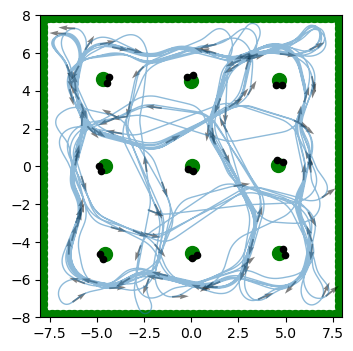

In [8]:
quiverspacing=100
fig, ax = plt.subplots(dpi=100)
ax.scatter(objects[objects[:,2]==2][:,0], objects[objects[:,2]==2][:,1], c='g', s=100)
ax.scatter(objects[objects[:,2]==1][:,0], objects[objects[:,2]==1][:,1], c='k', s=20)
ax.plot(poses[:,0], poses[:,1], linewidth=1, alpha=0.5)
ax.quiver(poses[::quiverspacing,0], poses[::quiverspacing,1], np.cos(poses[::quiverspacing,2]), np.sin(poses[::quiverspacing,2]), alpha=0.5)
ax.set_xlim([-8,8])
ax.set_ylim([-8,8])
ax.set_aspect('equal')

### Luck Policy
1. If see the bay --> Approach
2. Else --> Avoid

Seeing is defined as:
    1. seeing the beacons inview:
    2. the beacon yaw and bat yaw are opposite

-> Need write 3 functions for this